<a href="https://colab.research.google.com/github/Heimeinsheu/software_defects_phase1/blob/main/Dissertation_StratifiedTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stratified Train**


#Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

#Attribute Information:
 
 	
      1. loc             :   % McCabe's line count of code
      2. v(g)            :   % McCabe "cyclomatic complexity"
      3. ev(g)           :   % McCabe "essential complexity"
      4. iv(g)           :   % McCabe "design complexity"
      5. n               :   % Halstead total operators + operands
      6. v               :   % Halstead "volume"
      7. l               :   % Halstead "program length"
      8. d               :   % Halstead "difficulty"
      9. i               :   % Halstead "intelligence"
     10. e               :   % Halstead "effort"
     11. b               :   % Halstead 
     12. t               :   % Halstead's time estimator
     13. lOCode          :   % Halstead's line count
     14. lOComment       :   % Halstead's count of lines of comments
     15. lOBlank         :   % Halstead's count of blank lines
     16. lOCodeAndComment:  
     17. uniq_Op         :   % unique operators
     18. uniq_Opnd       :   % unique operands
     19. total_Op        :   % total operators
     20. total_Opnd      :   % total operands
     21. branchCount     :   % of the flow graph
     22. problems        : {no,yes}% module has/has not one or more 
                                   % reported defects


####**Calculate Numbers of Column in each dataset**

In [ ]:
print("attributes in jm1: ",jm1_df.shape[1])
print("attributes in ar1: ",ar1_df.shape[1])
print("attributes in ar3: ",ar3_df.shape[1])
print("attributes in ar4: ",ar4_df.shape[1])
print("attributes in ar5: ",ar5_df.shape[1])
print("attributes in ar6: ",ar6_df.shape[1])
print("attributes in kc1: ",kc1_df.shape[1])
print("attributes in cm1: ",cm1_df.shape[1])
print("attributes in pc1: ",pc1_df.shape[1])

attributes in jm1:  22
attributes in ar1:  30
attributes in ar3:  30
attributes in ar4:  30
attributes in ar5:  30
attributes in ar6:  30
attributes in kc1:  22
attributes in cm1:  22
attributes in pc1:  22


####**Assigning Header to each dataset**

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']


###**Checking type of each attribute in dataset.**

In [ ]:
print(kc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                  object
dtype: object


In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,yes
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,yes
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,yes
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,yes
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,yes
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,yes


In [ ]:
print(jm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                   object
uniq_Opnd                 object
total_Op                  object
total_Opnd                object
branchCount               object
problems                    bool
dtype: object


In [ ]:
jm1_df.loc[jm1_df['uniq_Op']=='?'].count()

l_count                  5
cyclomatic_complexity    5
essential_complexity     5
design_complexity        5
n                        5
v                        5
l                        5
d                        5
i                        5
e                        5
b                        5
t                        5
lOCode                   5
lOComment                5
lOBlank                  5
lOCodeAndComment         5
uniq_Op                  5
uniq_Opnd                5
total_Op                 5
total_Opnd               5
branchCount              5
problems                 5
dtype: int64

In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)

While converting attribute having object type into numeric type. I encounter many rows contain '?' value in respective attribute having object datatype.<br>
Performing drop() on that rows.

In [ ]:
jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']] = jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']].apply(pd.to_numeric)

In [ ]:
jm1_df.iloc[141:144,]

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
141,71,5,1,4,223,1338.00,0.06,16.07,83.25,21503.57,...,57,1,11,0,15,49,118,105,9,True
143,87,10,5,4,0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,18,True
144,19,2,1,2,43,188.87,0.12,8.64,21.87,1631.15,...,9,1,4,0,10,11,24,19,3,True


In [ ]:
print(pc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(cm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(ar1_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar3_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar4_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar5_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar6_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                        float64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

####**Converting attribute type from object to bool of respective dataset**
**kc2** is the only dataset that consist object type in **"problems"** attribute.

In [ ]:
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


####**Checking for null values**

In [ ]:
kc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
kc2_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
cm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
pc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
jm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
ar1_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar3_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar4_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar5_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar6_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

# Base measures: 
mu1             = number of unique operators<br>
mu2             = number of unique operands<br>
N1              = total occurrences of operators<br>
N2              = total occurrences of operands<br>
length     = N  = N1 + N2<br>
vocabulary = mu = mu1 + mu2<br><br>
**Constants set for each function:**<br>
mu1' =  2 = potential operator count (just the function name and the "return" operator)<br>
mu2'= potential operand count. (the number of arguments to the module)<br>    
For example, the expression "return max(w+x,x+y)" has "N1=4" operators "return, max, +,+)", "N2=4" operands (w,x,x,y),"mu1=3" unique operators (return, max,+), and "mu2=3" unique operands (w,x,y).<br>
<br> 
**Derived measures:**<br>
P = volume = V = N * log2(mu) (the number of mental comparisons needed to write a program of length N)<br>
V* = volume on minimal implementation = (2 + mu2')*log2(2 + mu2')<br>
L  = program length = V*/N<br>
D  = difficulty = 1/L<br>
L' = 1/D <br>
I  = intelligence = L'*V'<br>
E  = effort to write program = V/L<br> 
T  = time to write program = E/18 seconds<br>

#**kc2 Dataset**

In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,True
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,True
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,True
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,True
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,True


##**Spiliting DataSet**

Training: 80%
Testing: 20%



In [ ]:
x_kc2 = kc2_df.iloc[:,:-1]
y_kc2 = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_kc2,y_kc2,test_size=0.20,random_state=0, stratify=kc2_df.problems)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


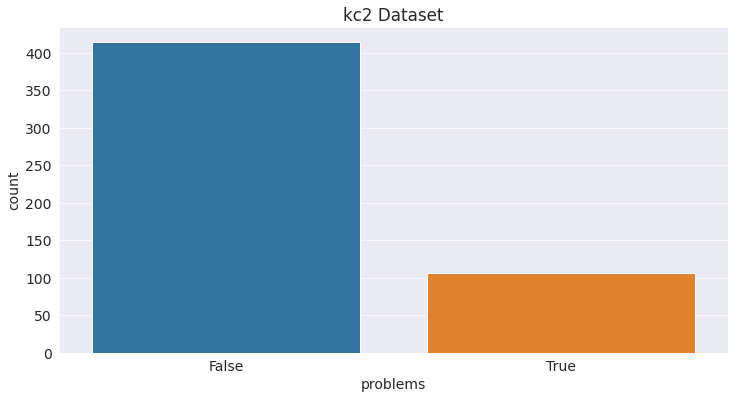

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


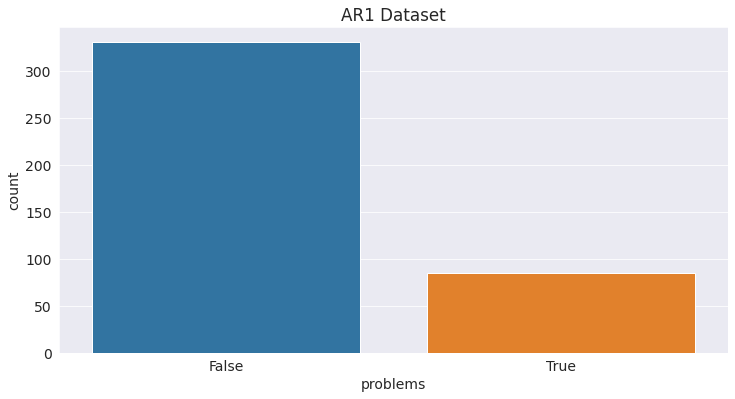

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)  
print(y_pred)

[False False  True False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False  True False False False False False  True False False False
  True False False False False False False False False False False False
 False False False False  True False False False False False False False
  True False False False False False  True False  True]


In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[77  6]
 [16  6]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7904761904761904

In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7904761904761904


##**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[79  4]
 [16  6]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8095238095238095


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[73 10]
 [12 10]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7904761904761904


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[78  5]
 [14  8]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.819047619047619


In [ ]:
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(classifier, x_kc2, y_kc2, cv = sk_folds)

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9879807692307693
Test data accuracy: 0.7333333333333333


#**kc1 Dataset**

In [ ]:
kc1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,83,11,1,11,171,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18,25,107,64,21,True
2,46,8,6,8,141,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16,28,89,52,15,True
3,25,3,1,3,58,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11,10,41,17,5,True
4,43,3,1,3,115,569.73,0.09,11.27,50.53,6423.73,...,35,2,4,0,11,20,74,41,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,19,2,1,2,40,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10,11,25,15,3,False
2104,23,3,3,3,60,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12,13,39,21,5,False
2105,2,1,1,1,4,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3,1,3,1,1,False
2106,13,1,1,1,17,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6,6,9,8,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = kc1_df.iloc[:,:-1]
y = kc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=kc1_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


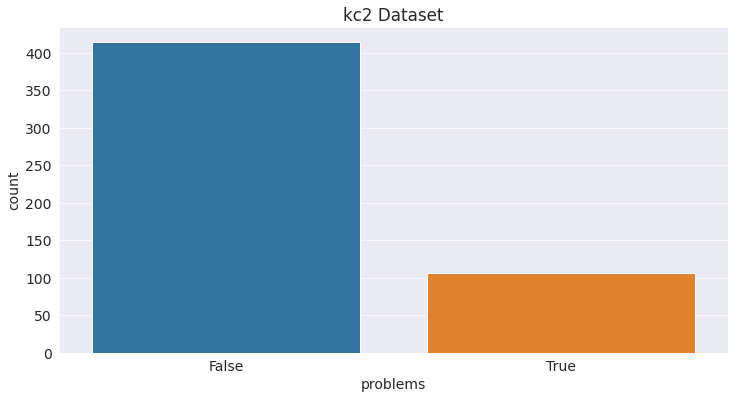

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


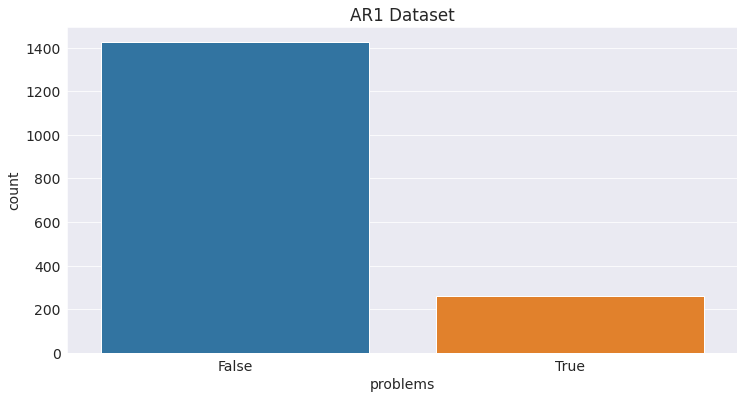

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.8601895734597157
Confusion Matrix: 
 [[350   7]
 [ 52  13]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[353   4]
 [ 57   8]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8554502369668247


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[321  36]
 [ 48  17]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8009478672985783


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[338  19]
 [ 41  24]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8578199052132701


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9893238434163701
Test data accuracy: 0.8056872037914692


#**cm1 Dataset**

In [ ]:
cm1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,24,5,1,3,63,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15,15,44,19,9,False
2,20,4,4,2,47,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16,8,31,16,7,False
3,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
4,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,47,3,1,3,256,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23,46,144,112,5,True
493,24,4,3,3,107,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22,23,67,40,7,True
494,82,11,3,10,475,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32,68,285,190,21,True
495,10,2,1,1,32,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13,13,19,13,3,True


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = cm1_df.iloc[:,:-1]
y = cm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=cm1_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


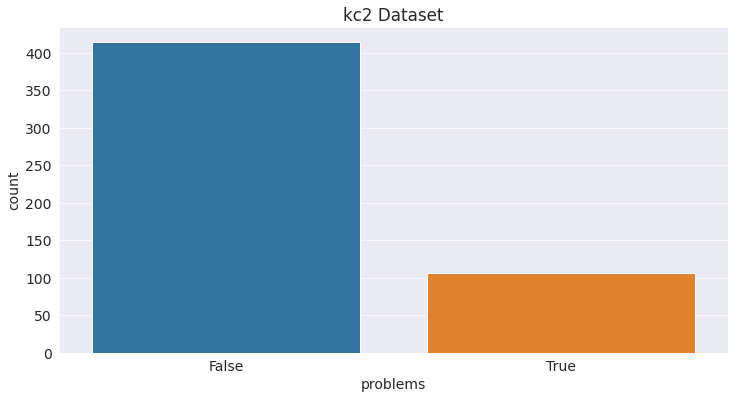

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


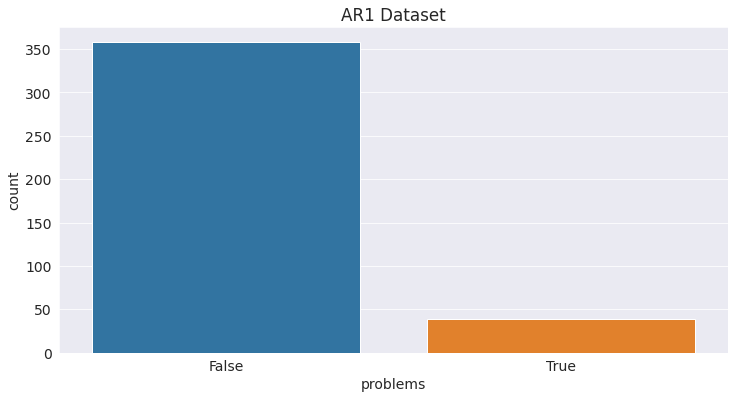

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.9
Confusion Matrix: 
 [[89  1]
 [ 9  1]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[90  0]
 [10  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[76 14]
 [ 9  1]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.77


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[90  0]
 [10  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8


#**pc1**

In [ ]:
pc1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,91,9,3,2,318,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29,66,192,126,17,True
2,109,21,5,18,381,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28,75,229,152,38,True
3,505,106,41,82,2339,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64,397,1397,942,178,True
4,107,25,7,14,619,4282.78,0.02,52.91,80.95,226588.75,...,103,32,4,39,35,86,359,260,40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,6,4,4,1,26,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10,3,18,8,7,False
1104,10,5,5,1,43,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14,5,28,15,9,False
1105,5,3,3,1,17,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8,5,11,6,5,False
1106,18,8,5,5,111,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22,24,61,50,15,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = pc1_df.iloc[:,:-1]
y = pc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=pc1_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


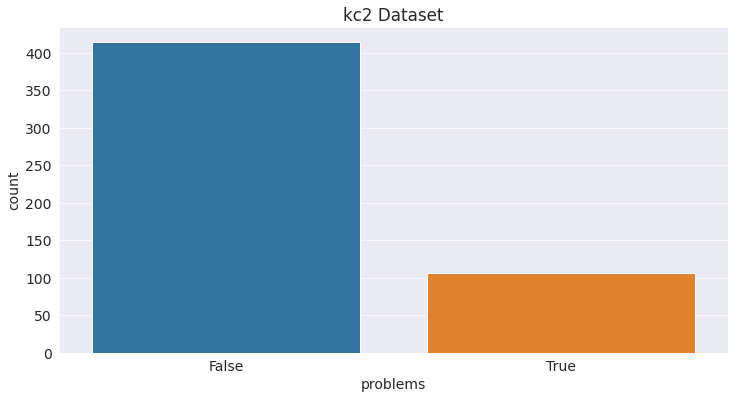

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


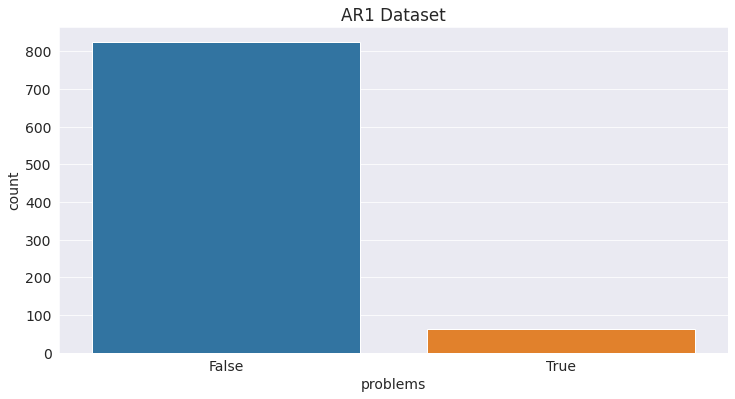

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.9279279279279279
Confusion Matrix: 
 [[203   4]
 [ 12   3]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[207   0]
 [ 12   3]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9459459459459459


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[198   9]
 [  9   6]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.918918918918919


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[206   1]
 [ 11   4]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9459459459459459


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9966139954853274
Test data accuracy: 0.9099099099099099


#**jm1**

In [ ]:
jm1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,72,7,1,6,198,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
2,190,3,1,3,600,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
3,37,4,1,4,126,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
4,31,2,1,2,111,582.52,0.08,12.25,47.55,7135.87,...,19,0,5,0,14,24,69,42,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,18,4,1,4,52,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10880,9,2,1,2,30,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10881,42,4,1,2,103,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10882,10,1,1,1,36,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = jm1_df.iloc[:,:-1]
y = jm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=jm1_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


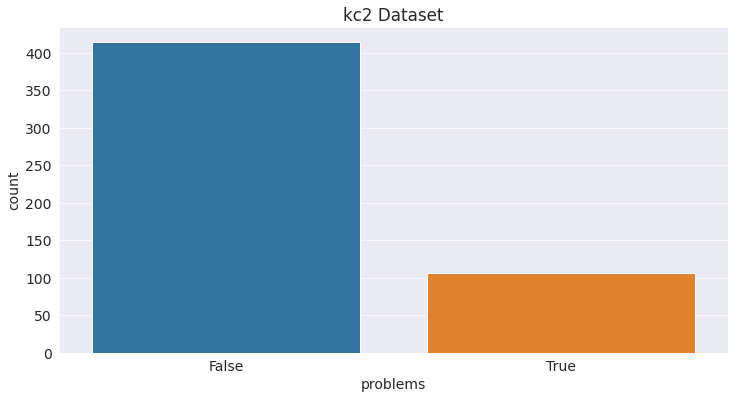

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


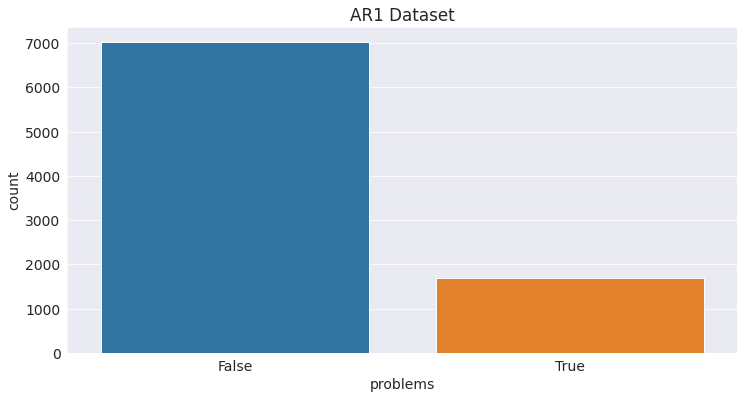

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.8092830882352942
Confusion Matrix: 
 [[1718   37]
 [ 378   43]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1730   25]
 [ 386   35]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8111213235294118


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[1480  275]
 [ 264  157]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7522977941176471


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1656   99]
 [ 326   95]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8046875


In [ ]:
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(classifier, x, y, cv = sk_folds)

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9895438354590371
Test data accuracy: 0.7582720588235294


#**ar1 Dataset**

In [ ]:
ar1_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,problems
0,9,0,1,0,8,7,8,15,20,15,...,0,0,2,0.25,0.00,0,0.00,0.22,0,False
1,21,0,14,1,7,15,12,21,36,27,...,4,1,4,0.57,1.00,1,0.25,0.19,0,False
2,30,0,11,0,19,16,18,50,70,34,...,9,2,9,0.47,1.11,1,0.11,0.30,0,True
3,8,0,2,0,6,4,5,5,10,9,...,1,0,2,0.33,1.00,1,0.50,0.25,0,False
4,7,0,1,0,6,4,5,4,11,9,...,0,0,2,0.33,0.00,2,1.00,0.29,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,32,0,5,0,27,16,11,33,56,27,...,9,1,8,0.30,1.00,0,0.00,0.25,0,False
116,6,0,0,0,6,3,5,5,11,8,...,2,0,3,0.50,1.00,0,0.00,0.50,0,False
117,6,0,0,0,6,6,6,6,11,12,...,2,1,2,0.33,1.00,1,0.50,0.33,0,False
118,27,0,3,0,24,16,9,26,44,25,...,8,3,6,0.25,1.00,1,0.17,0.22,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar1_df.iloc[:,:-1]
y = ar1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=ar1_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


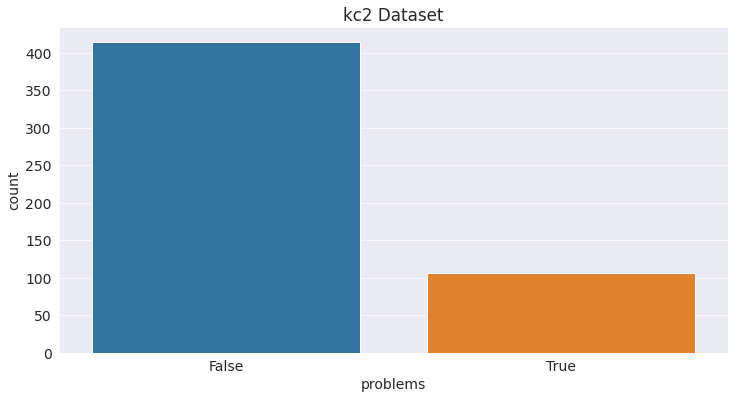

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


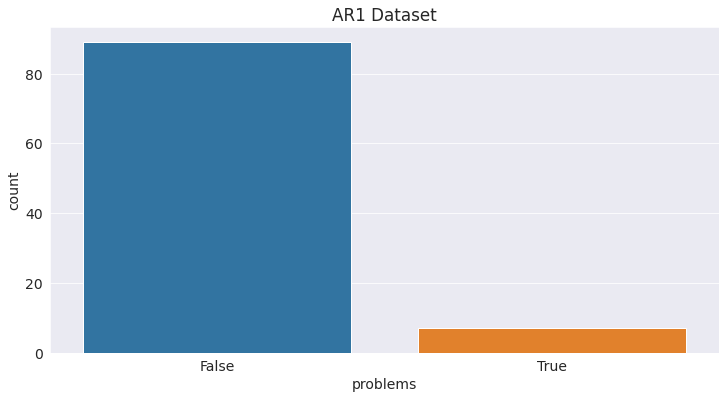

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.9583333333333334
Confusion Matrix: 
 [[22  0]
 [ 1  1]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[22  0]
 [ 2  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9166666666666666


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[22  0]
 [ 2  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9166666666666666


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[22  0]
 [ 2  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9166666666666666


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9895833333333334
Test data accuracy: 0.8333333333333334


#**ar3 Dataset**

In [ ]:
ar3_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,problems
0,3,0,0,0,3,4,6,6,8,10,...,0,0,1,0.33333,0.0000,0,0.000000,0.333330,0,False
1,268,72,22,0,174,125,23,337,484,148,...,94,32,64,0.36782,1.0106,0,0.000000,0.238810,0,False
2,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.11111,0.0000,2,2.000000,0.090909,0,False
3,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.14286,0.0000,1,1.000000,0.111110,0,False
4,10,2,0,0,8,7,4,13,15,11,...,0,0,1,0.12500,0.0000,2,2.000000,0.100000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,173,59,22,6,92,77,31,277,352,108,...,53,14,40,0.43478,1.0189,0,0.000000,0.231210,0,True
58,114,32,12,3,70,46,23,134,180,69,...,27,7,22,0.31429,1.0370,1,0.045455,0.192980,0,False
59,148,41,5,0,102,42,16,147,208,58,...,24,7,18,0.17647,1.0000,0,0.000000,0.121620,0,False
60,10,0,0,0,10,11,7,30,38,18,...,12,6,7,0.70000,1.0000,1,0.142860,0.700000,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar3_df.iloc[:,:-1]
y = ar3_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=ar3_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


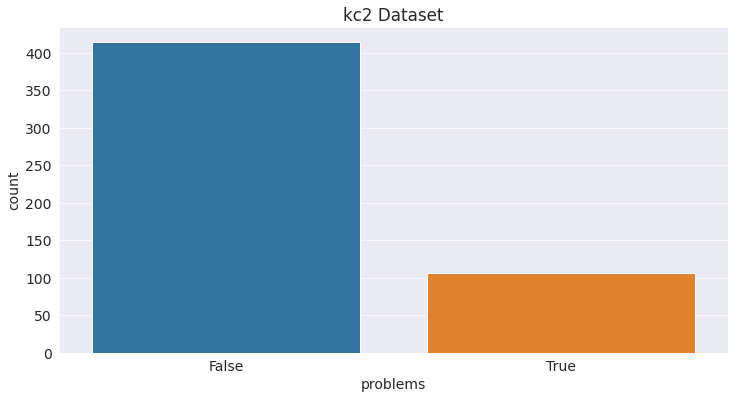

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


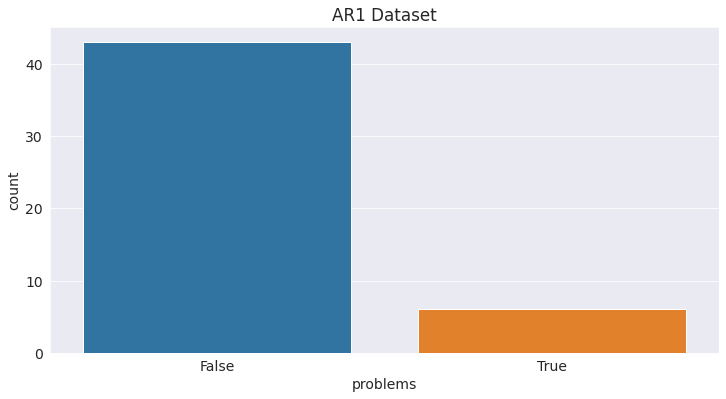

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.9230769230769231
Confusion Matrix: 
 [[11  1]
 [ 0  1]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[12  0]
 [ 1  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9230769230769231


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[12  0]
 [ 1  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.9230769230769231


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[12  0]
 [ 0  1]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  1.0


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


#**ar4 Dataset**

In [ ]:
ar4_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,problems
0,53,22,5,0,26,18,16,38,54,34,...,5,2,5,0.19231,1.2,0,0.00,0.094340,1,False
1,25,10,1,0,14,12,14,42,58,26,...,1,0,2,0.14286,1.0,0,0.00,0.080000,2,False
2,73,22,8,1,43,25,12,67,97,37,...,15,7,9,0.20930,1.0,0,0.00,0.123290,0,False
3,69,21,17,0,31,16,9,28,48,25,...,13,6,8,0.25806,1.0,0,0.00,0.115940,0,False
4,42,18,1,0,23,12,10,23,39,22,...,7,1,7,0.30435,1.0,0,0.00,0.166670,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,71,27,9,0,35,19,16,53,80,35,...,5,1,6,0.17143,1.2,0,0.00,0.084507,0,False
102,79,40,5,0,34,23,10,52,79,33,...,9,2,8,0.23529,1.0,2,0.25,0.101270,0,False
103,19,8,0,0,11,8,14,19,29,22,...,1,0,3,0.27273,2.0,0,0.00,0.157890,2,False
104,119,59,13,0,47,20,23,68,107,43,...,10,2,10,0.21277,1.1,2,0.20,0.084034,0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar4_df.iloc[:,:-1]
y = ar4_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=ar4_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


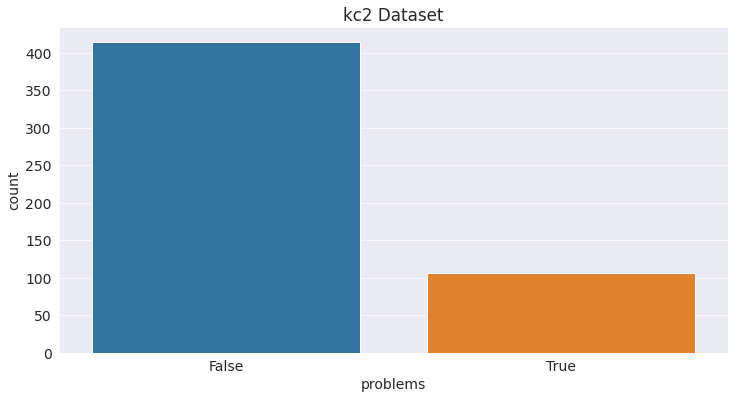

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


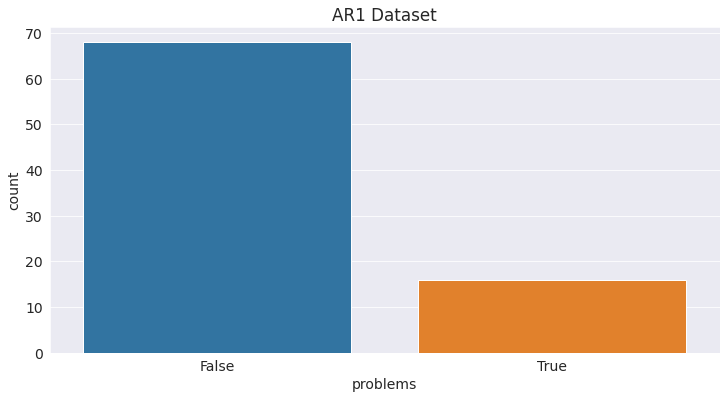

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.9090909090909091
Confusion Matrix: 
 [[18  0]
 [ 2  2]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[17  1]
 [ 2  2]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8636363636363636


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[17  1]
 [ 2  2]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8636363636363636


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[17  1]
 [ 2  2]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8636363636363636


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9090909090909091


#**ar5 Dataset**

In [ ]:
ar5_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,problems
0,16,6,2,1,8,13,6,18,20,19,...,0,0,2,0.250000,0.0000,1,0.500000,0.125000,1,False
1,31,12,3,2,16,18,9,31,42,27,...,5,0,6,0.375000,1.0000,1,0.166670,0.193550,0,False
2,477,104,89,2,284,150,29,482,699,179,...,116,25,93,0.327460,1.0172,4,0.043011,0.194970,0,True
3,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.111110,0.0000,2,2.000000,0.090909,0,False
4,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.142860,0.0000,1,1.000000,0.111110,0,False
5,10,2,0,0,8,7,4,13,15,11,...,0,0,1,0.125000,0.0000,2,2.000000,0.100000,0,False
6,5,0,0,0,5,5,3,5,9,8,...,0,0,1,0.200000,0.0000,3,3.000000,0.200000,0,False
7,28,5,1,0,22,18,12,49,53,30,...,3,1,4,0.181820,1.3333,2,0.500000,0.142860,1,False
8,26,6,0,0,20,16,11,41,44,27,...,1,0,3,0.150000,2.0000,2,0.666670,0.115380,0,False
9,15,4,0,0,11,11,5,19,22,16,...,0,0,1,0.090909,0.0000,7,7.000000,0.066667,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar5_df.iloc[:,:-1]
y = ar5_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=ar5_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


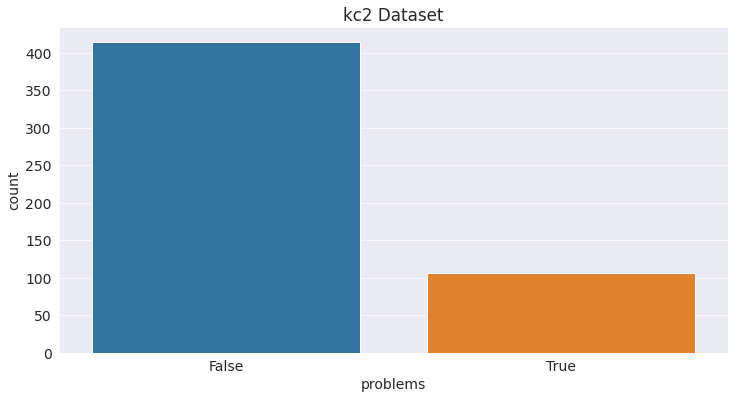

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


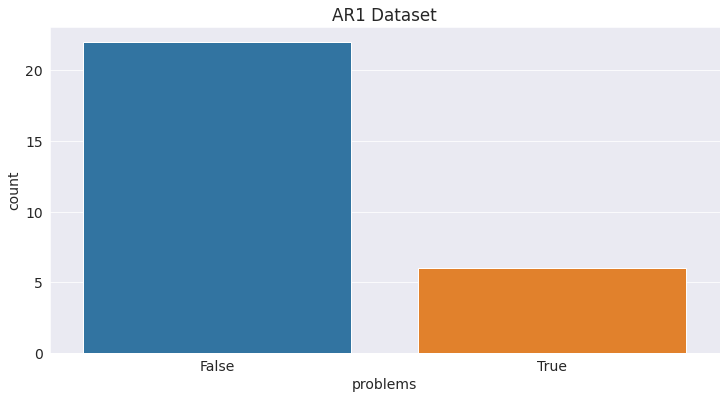

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.8571428571428571
Confusion Matrix: 
 [[4 1]
 [0 2]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[5 0]
 [0 2]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  1.0


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[4 1]
 [0 2]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[4 1]
 [1 1]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7142857142857143


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8571428571428571


#**ar6 Dataset**

In [ ]:
ar6_df

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,problems
0,13,0,1,0,12,10,8,21,26,18,...,0,0,2,0.17,0.00,0.0,0.00,0.15,0.0,False
1,20,0,12,0,8,14,12,21,34,26,...,3,0,4,0.50,1.00,0.0,0.00,0.20,0.0,False
2,40,0,17,0,23,20,18,64,90,38,...,11,2,11,0.48,1.09,1.0,0.09,0.28,0.0,False
3,8,0,3,0,5,7,13,13,21,20,...,1,0,3,0.60,2.00,0.0,0.00,0.38,1.0,False
4,10,0,2,0,8,4,5,5,10,9,...,1,0,2,0.25,1.00,1.0,0.50,0.20,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,0,10,0,17,15,9,36,48,24,...,4,1,4,0.24,1.00,5.0,1.25,0.15,0.0,False
96,9,0,0,0,9,7,3,8,15,10,...,0,0,1,0.11,0.00,6.0,6.00,0.11,0.0,False
97,10,0,7,0,3,7,3,7,15,10,...,0,0,1,0.33,0.00,6.0,6.00,0.10,0.0,False
98,51,2,17,0,32,26,9,44,69,35,...,6,0,7,0.22,1.00,8.0,1.14,0.14,0.0,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar6_df.iloc[:,:-1]
y = ar6_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, stratify=ar6_df.problems)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


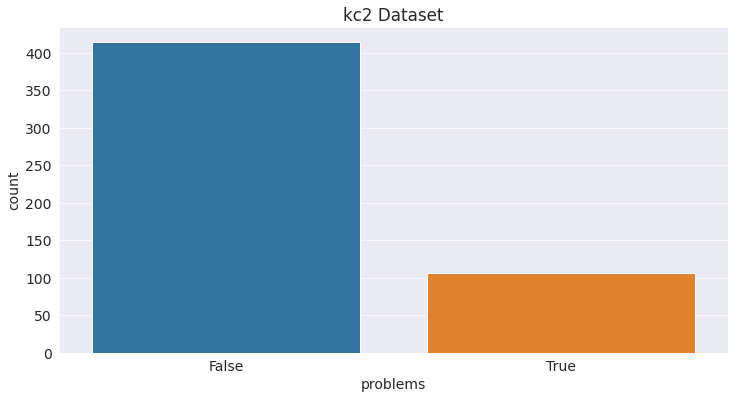

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


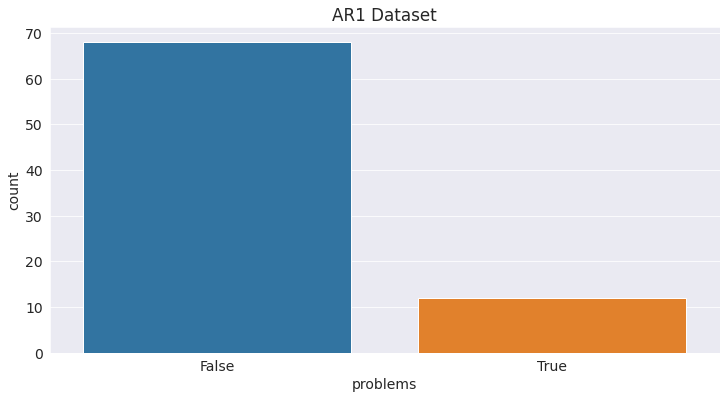

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.85
Confusion Matrix: 
 [[17  0]
 [ 3  0]]


###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[17  0]
 [ 3  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.85


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[14  3]
 [ 3  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[17  0]
 [ 3  0]]


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.85


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8
